<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

To evaluate how our models would perform on new data, we split our data into a training set and a test set, train only on the training set, and evaluate on the test set. In $k$-fold cross validation we repeat this process $k$ times, using a different subset of our data as the test set each time.

We use this process to compare multiple models on the same data set. Those models could be variations on a single type (e.g. linear regression models with and without a particular feature), or they could be of completely different types.

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Practice

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston.

In [93]:
import matplotlib.pyplot as plt

% matplotlib inline

In [143]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])
X

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


- Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)
- Scatterplot of each column with median price

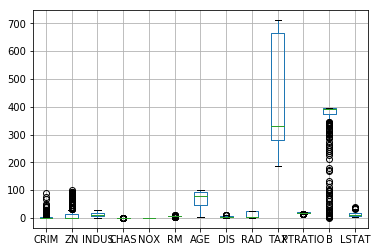

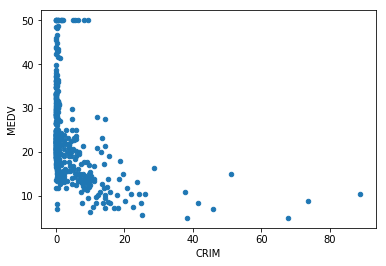

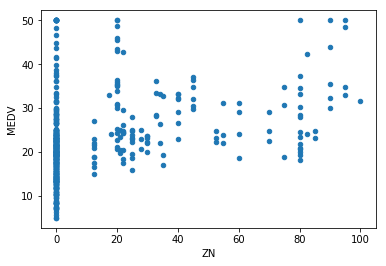

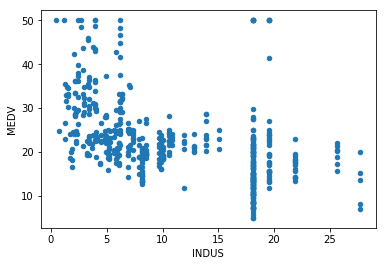

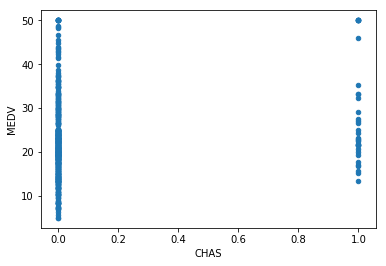

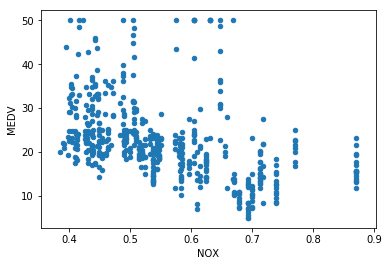

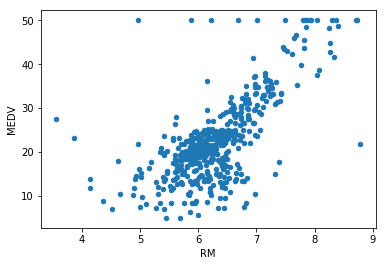

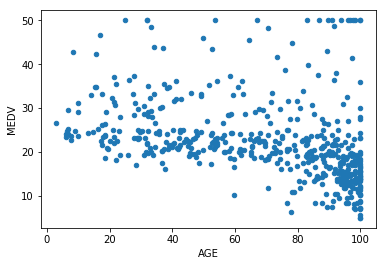

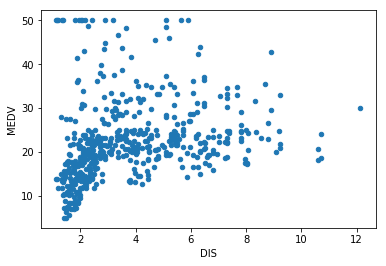

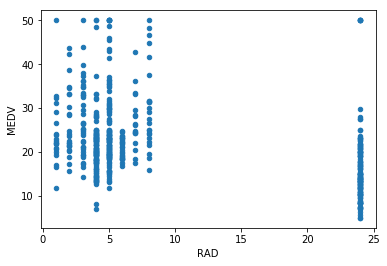

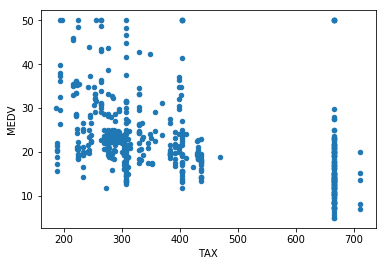

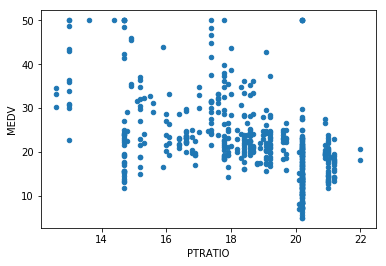

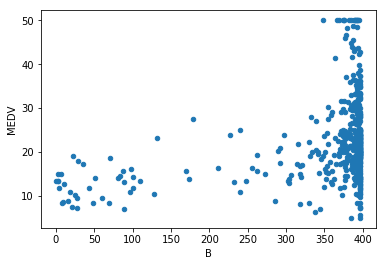

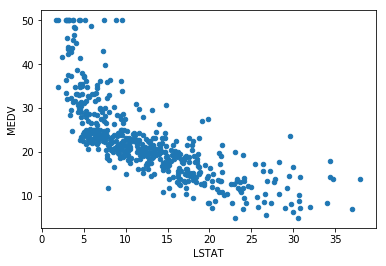

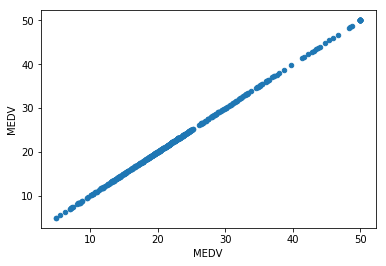

In [164]:
X.shape
X.dtypes
X.isnull().sum()
X.describe()

for col in X:
    X.loc[:,col].unique()
    
X.boxplot()

plot_df = X.copy()
plot_df['MEDV'] = y

for col in plot_df:
    plot_df.plot(kind='scatter',x=col,y='MEDV')

- Get the MSE of a null model that simply predicts the mean value of MEDV. (You could do a train/test split here, but it won't make much difference for such a simple model.)

In [146]:
from sklearn import metrics

null_pred = np.zeros(len(y)) + np.array(np.mean(y))
null_pred = pd.Series(null_pred)
null_mse = metrics.mean_squared_error(y, null_pred)
null_mse

84.41955615616554

- Develop a linear regression model to predict MEDV. Train it on 70% of the data. Gets its MSE on both that 70% and the other 30%.

In [274]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
    
# Train model
linreg = LinearRegression()
linreg.fit(X_train, y_train)
    
# Get y_pred for X_train data
y_pred = linreg.predict(X_train)
mse = metrics.mean_squared_error(y_train, y_pred)
print ('First 70%:', mse)

y_pred = linreg.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
print ('Second 30%:', mse)

First 70%: 22.065677492859226
Second 30%: 23.05723506978748


- K-fold cross-validation is slower than a simple train/test split, but it gives more reliable estimates of generalization error. Use ten-fold cross-validation to evaluate your model's MSE on both training and test data. Use this result to answer the following questions.

In [300]:
from sklearn import model_selection


def Kfolds_linear(X,y):
    kf = model_selection.KFold(n_splits=10, shuffle = True,random_state=4)

    mse_train_scores = []
    mse_test_scores = []

    for train_indices, test_indices in kf.split(X, y):
        lr = LinearRegression()
        X_train = X.iloc[train_indices, :]
        y_train = y.iloc[train_indices]
        lr.fit(X_train, y_train)

        X_test = X.iloc[test_indices, :]
        y_test = y.iloc[test_indices]
        y_pred = lr.predict(X_test)

        y_pred_train = lr.predict(X_train)

        mse_train = metrics.mean_squared_error(y_train, y_pred_train)
        mse_train_scores.append(mse_train)

        mse_test = metrics.mean_squared_error(y_test, y_pred)
        mse_test_scores.append(mse_test)

    print('MSE train:',np.array(mse_train_scores).mean())
    print('MSE test:',np.array(mse_test_scores).mean())
    print('MSE train STD:',np.std(np.array(mse_train_scores)))
    print('MSE test STD:',np.std(np.array(mse_test_scores)))
    
Kfolds_linear(X,y)

MSE train: 21.803221100308562
MSE test: 23.7325419122501
MSE train STD: 1.047419647141259
MSE test STD: 10.018641094290105


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

The model performed better than the null model.  The increased variance of our model improves the predictions compared to the simple null model.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

The model performed better on some training sets and some test sets.  This implies high variance since the result is inconsistent.

- How much of a bias problem does your model appear to have? Why do you say that?

There does not appear to be a bias problem because the MSE is fairly low compared to the null model.

- How much of a variance problem does your model appear to have? Why do you say that?

There appears to be a variance problem since there is sizeable variance in the MSE across the test sets.

- Add or remove variables from your model to address this problem, and get its test-set MSE using ten-fold cross validation. Did your model get better or worse? By how much?

In [301]:
X_reduced = X.copy()
#X_reduced.drop('CRIM',axis='columns',inplace = True)
#X_reduced.drop('NOX',axis='columns',inplace = True)
#X_reduced.drop('RAD',axis='columns',inplace = True)
#X_reduced.drop('B',axis='columns',inplace = True)
#X_reduced.drop('DIS',axis='columns',inplace = True)
X_reduced.drop('AGE',axis='columns',inplace = True)
#X_reduced.drop('CHAS',axis='columns',inplace = True)
#X_reduced.drop('ZN',axis='columns',inplace = True)
Kfolds_linear(X_reduced,y)

MSE train: 21.811377259180464
MSE test: 23.573317542221282
MSE train STD: 1.0442588244772313
MSE test STD: 9.952699532389058


Removing AGE lowered the standard deviation of the MSE for 7 out of 10 random states that I tested.  It also reduced the average MSE for the test sets.

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

Tip: Look at scatterplots of MEDV against your column(s) before and after applying the transformation. The transformation should help if it makes the relationship more linear.

# KNN Practice

In [302]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [303]:
iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [304]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

- Map each iris species to a number. Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and assign the result to a column called 'species_num'.

In [306]:
iris.loc[:,'species_num'] = iris.loc[:,'species'].map({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2})

- Clean Up Data and Perform Exporatory Data Analysis

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot) grouped by species

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20afb748>,
      dtype=object)

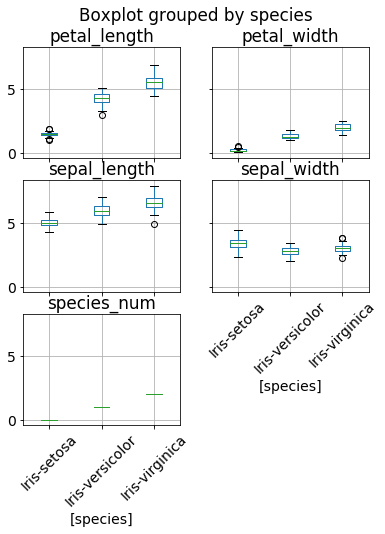

In [330]:
iris.shape
iris.dtypes
iris.isnull().sum()
iris.describe()

for col in iris:
    iris.loc[:,col].unique()
    
iris.boxplot(by='species', figsize=(6, 7),rot=45)

- Get the accuracy of a null model that simply predicts the most common species.

In [334]:
max_count = iris.loc[:,'species_num'].value_counts().max()
total = iris.loc[:,'species_num'].value_counts().sum()
null_accuracy = max_count/total
null_accuracy

#y = iris.loc[:,'species_num']

# from sklearn import metrics


# null_pred = np.zeros(len(y)) + np.array(np.mean(y))
# null_pred = pd.Series(null_pred)
# null_mse = metrics.mean_squared_error(y, null_pred)
# null_mse
# metrics.accuracy_score(y_pred,y)

0.3333333333333333

- Develop a KNN model to predict species. Use ten-fold cross-validation to evaluate your model's accuracy on both training and test data. Remember to standardize your feature variables!

In [391]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

def Kfolds_knn(X,y,neighbors):
    kf = model_selection.KFold(n_splits=10, shuffle = True,random_state=4)

    accuracy_train_scores = []
    accuracy_test_scores = []

    for train_indices, test_indices in kf.split(X, y):
        knn = KNeighborsClassifier(n_neighbors=neighbors)
        
        X_train = X.iloc[train_indices, :]
        y_train = y.iloc[train_indices]
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train_std = scaler.transform(X_train)
        
        knn.fit(X_train_std, y_train)

        X_test = X.iloc[test_indices, :]
        y_test = y.iloc[test_indices]
        X_test_std = scaler.transform(X_test)
        
        y_pred = knn.predict(X_test_std)

        y_pred_train = knn.predict(X_train_std)

        train_accuracy = metrics.accuracy_score(y_train, y_pred_train)
        accuracy_train_scores.append(train_accuracy)

        test_accuracy = metrics.accuracy_score(y_test, y_pred)
        accuracy_test_scores.append(test_accuracy)

    print('Accuracy train:',np.array(accuracy_train_scores).mean())
    print('Accuracy test:',np.array(accuracy_test_scores).mean())
    print('Accuracy train STD:',np.std(np.array(accuracy_train_scores)))
    print('Accuracy test STD:',np.std(np.array(accuracy_test_scores)))
    
    return np.array(accuracy_test_scores).mean()
    
    
iris_reduced = iris.copy()
iris_reduced.drop('species',axis='columns',inplace = True)
iris_reduced.drop('species_num',axis='columns',inplace = True)
y = iris.loc[:,'species_num']
    
    
test_accuracy = Kfolds_knn(iris_reduced,y,1)

Accuracy train: 1.0
Accuracy test: 0.9466666666666667
Accuracy train STD: 0.0
Accuracy test STD: 0.04988876515698587


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

The model performed much better than the null model.  The increased variance of our model improves the predictions compared to the simple null model.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

The test set performed much worse than the training set but with low variance.  There is a bias problem.

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

There is a bias problem since we are only using the single nearest neighbor to perform the classification.

- Adjust $k$ to address this problem, and get the resulting test-set accuracy using ten-fold cross validation. Did your model get better or worse? By how much?

In [393]:
iris_reduced = iris.copy()
iris_reduced.drop('species',axis='columns',inplace = True)
iris_reduced.drop('species_num',axis='columns',inplace = True)
y = iris.loc[:,'species_num']
    
    
Kfolds_knn(iris_reduced,y,6)

Accuracy train: 0.9651851851851851
Accuracy test: 0.96
Accuracy train STD: 0.009398946326258886
Accuracy test STD: 0.044221663871405324


0.96

The model got more accurate by about 1.5% on average.

- Plot your model's test-set accuracy across a range of $k$ values using ten-fold cross validation. Use a large enough range of $k$ values to provide reasonable assurance that making $k$ larger would not help.

Tip: Use functions and loops to avoid writing duplicate code.

In [386]:
test_scores = []

for k in range(1, 100):
    test_accuracy = Kfolds_knn(iris_reduced,y,k)
    test_scores.append([k,test_accuracy])

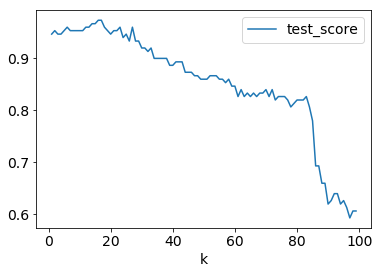

In [389]:
scores_df = pd.DataFrame(test_scores, columns=['k', 'test_score'])
scores_df.head()

# Plot training scores against k
ax = scores_df.plot(x='k', y='test_score')

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

## Bonus

`scikit-learn` is the most popular machine learning library in Python, but there are alternative packages that have different strengths. 

### Example: Using the Statsmodels Formula

In [7]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.loc[:, 'MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1220.
Date:                Sun, 20 May 2018   Prob (F-statistic):          1.59e-321
Time:                        10:10:40   Log-Likelihood:                -1567.7
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     498   BIC:                             3185.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9744      0.224     22.197      0.000       4.534       5.415
LSTAT         -0.5615      0.048    -11.817      0.000      -0.655      -0.468
RAD            0.2109      0.070      3.025      0.003       0.074       0.348
TAX           -0.0174      0.004     -4.267      0.000      -0.025      -0.009
NOX            4.3456      3.385      1.284      0.200      -2.305      10.997
INDUS          0.0925      0.067      1.385      0.167      -0.039       0.224
CRIM          -0.0866      0.037     -2.362      0.019      -0.159      -0.015
ZN             0.0288      0.013      2.215      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.072   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              831.634
Skew:                           1.665   Prob(JB):                    2.59e-181
Kurtosis:                       8.325   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

In [ ]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [ ]:
# Check out Pearson scores


### Demo: Patsy

In [9]:
import patsy

# Add response to the core DataFrame
df.loc[:, 'MEDV'] = y

In [10]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


/Users/greg/anaconda3/envs/ga/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [11]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.40402292728493383
